

*** ================================================================================= ***

Dataset : Coffee Beans Rating

*** ================================================================================= ***



In [40]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kendalltau
import pickle
import plotly.express  as px 
import plotly.graph_objects as go


# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer , OutlierTrimmer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTENC
from plotly.subplots import make_subplots

# Model 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Untuk mengabaikan fitur peringatan
import warnings
warnings.filterwarnings('ignore')

print("Import Berhasil")

Import Berhasil


In [41]:
# Load Dataset
df = pd.read_csv('./dataset/coffee.csv')
df

,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
0,United States,kona,0,0,0,2010,kona pacific farmers cooperative,Arabica,NaN,NaN,...,8.42,8.08,7.75,7.67,7.83,10.00,10.00,0.00,86.25,Unknown
1,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,7.92,7.75,8.33,8.00,10.00,10.00,0.08,86.17,Unknown
2,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,8.00,7.75,7.92,8.00,10.00,10.00,0.01,86.17,Unknown
3,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,8.00,7.83,8.00,7.92,7.83,10.00,10.00,0.00,85.08,Unknown
4,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,7.83,7.58,8.00,7.83,7.50,10.00,10.00,0.10,83.83,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,Guatemala,san marcos,1700,1700,1700,2017,juan luis alvarado romero,Arabica,Bourbon,Washed / Wet,...,7.67,7.42,7.42,7.67,7.67,8.67,8.67,0.10,79.08,Green
985,Honduras,comayagua,1400,1400,1400,2017,bismarck castro,Arabica,Caturra,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,Green
986,India,chikmagalur karnataka indua,3170,3170,3170,2017,nishant gurjer,Robusta,NaN,Washed / Wet,...,7.75,7.92,8.00,7.92,7.92,10.00,8.00,0.00,83.50,Unknown
987,India,chikmagalur karnataka india,3140,3140,3140,2017,nishant gurjer,Robusta,NaN,Washed / Wet,...,7.75,7.83,7.67,7.92,7.83,10.00,7.92,0.10,82.50,Bluish-Green


*Description:*
| No. | Nama Kolom | Deskripsi |
|-----|----------- | --------- |
|1|Location.Country | Negara tempat kopi diproduksi. |
|2|Location.Region | Wilayah tempat kopi diproduksi. |
|3|Location.Altitude.Min| Ketinggian minimum kebun. |
|4|Location.Altitude.Max| Ketinggian maksimal kebun. |
|5|Location.Altitude.Average| Ketinggian rata-rata kebun.  |
|6|Year| Tahun produksi. |
|7|Data.Owner| Pemilik kopi.|
|8|Data.Type.Species | Spesies kopi. |
|9|Data.Type.Variety. | Variasi kopi. |
|10|Data.Type.Processing method | Metode pengolahan yang digunakan. |
|11|Data.Production.Number of bags| Jumlah kantong yang diuji. |
|12|Data.Production.Bag weight| Berat kantong yang diuji. |
|13|Data.Scores.Aroma| Skor aroma 0-10.  |
|14|Data.Scores.Flavor| Skor rasa 0-10. |
|15|Data.Scores.Aftertaste| Skor sisa rasa 0-10.|
|16|Data.Scores.Acidity | Skor keasaman 0-10. |
|17|Data.Scores.Body | Skor tubuh 0-10. |
|18|Data.Scores.Balance | Skor keseimbangan 0-10. |
|19|Data.Scores.Uniformity| Skor keseragaman 0-10. |
|20|Data.Scores.Sweetness| Skor rasa manis 0-10. |
|21|Data.Scores.Moisture| Skor kelembaban 0-10.  |
|22|Data.Scores.Total| Skor total. |
|23|Data.Color| Warna kacang.|

In [42]:
# Menampilkan 10 baris pertama dari sebuah DataFrame
df.head(10)

,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
0,United States,kona,0,0,0,2010,kona pacific farmers cooperative,Arabica,NaN,NaN,...,8.42,8.08,7.75,7.67,7.83,10.00,10.00,0.00,86.25,Unknown
1,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,7.92,7.75,8.33,8.00,10.00,10.00,0.08,86.17,Unknown
2,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,...,7.92,8.00,7.75,7.92,8.00,10.00,10.00,0.01,86.17,Unknown
3,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,8.00,7.83,8.00,7.92,7.83,10.00,10.00,0.00,85.08,Unknown
4,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,7.83,7.58,8.00,7.83,7.50,10.00,10.00,0.10,83.83,Unknown
5,United States,kona,0,0,0,2010,kona pacific farmers cooperative,Arabica,NaN,NaN,...,7.92,7.42,7.67,7.83,7.58,10.00,10.00,0.01,83.42,Unknown
6,Indonesia,dolok sanggul,1300,1400,1350,2010,specialty coffee association of indonesia,Arabica,NaN,NaN,...,7.58,7.50,7.58,7.67,7.58,10.00,10.00,0.00,83.08,Unknown
7,Ethiopia,kelem welega,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,7.25,7.25,7.33,7.50,8.00,9.33,10.00,0.10,80.33,Unknown
8,Ethiopia,limu,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,...,7.42,7.50,7.92,7.75,7.58,8.67,8.67,0.05,80.00,Unknown
9,Haiti,marmelade,640,1400,1020,2010,myriam kaplan-pasternak,Arabica,NaN,NaN,...,6.75,7.08,7.17,7.33,6.67,10.00,8.67,0.08,72.33,Unknown


In [43]:
# Menampilkan 10 baris terakhir dari sebuah DataFrame 
df.tail(10)

,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
979,Nicaragua,jinotega,1250,1250,1250,2017,"comercial internacional exportadora, s.a.",Arabica,Caturra,Washed / Wet,...,7.08,6.92,7.08,7.42,7.17,10.00,10.00,0.10,80.00,Green
980,Kenya,kiambu,1500,1500,1500,2017,kennedy macharia,Arabica,SL34,Washed / Wet,...,7.08,7.00,7.17,7.25,7.25,10.00,10.00,0.11,79.83,Unknown
981,Guatemala,san marcos,1700,1700,1700,2017,juan luis alvarado romero,Arabica,Bourbon,Washed / Wet,...,7.25,6.92,7.33,7.25,7.33,9.33,10.00,0.10,79.83,Green
982,Guatemala,santa rosa,1219,1219,1219,2017,juan luis alvarado romero,Arabica,Bourbon,Washed / Wet,...,7.42,7.33,7.42,7.50,7.42,8.67,9.33,0.10,79.17,Green
983,Honduras,ocotepeque,1650,1650,1650,2017,janny marlith torres,Arabica,Catuai,Washed / Wet,...,7.00,6.75,6.92,7.00,6.92,10.00,10.00,0.11,79.17,Green
984,Guatemala,san marcos,1700,1700,1700,2017,juan luis alvarado romero,Arabica,Bourbon,Washed / Wet,...,7.67,7.42,7.42,7.67,7.67,8.67,8.67,0.10,79.08,Green
985,Honduras,comayagua,1400,1400,1400,2017,bismarck castro,Arabica,Caturra,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,Green
986,India,chikmagalur karnataka indua,3170,3170,3170,2017,nishant gurjer,Robusta,NaN,Washed / Wet,...,7.75,7.92,8.00,7.92,7.92,10.00,8.00,0.00,83.50,Unknown
987,India,chikmagalur karnataka india,3140,3140,3140,2017,nishant gurjer,Robusta,NaN,Washed / Wet,...,7.75,7.83,7.67,7.92,7.83,10.00,7.92,0.10,82.50,Bluish-Green
988,Honduras,western region,1200,1200,1200,2018,mdh,Arabica,Catimor,Washed / Wet,...,7.42,7.08,7.42,7.50,7.33,10.00,10.00,0.11,81.58,Blue-Green


In [44]:
# Mengakses informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location.Country                989 non-null    object 
 1   Location.Region                 953 non-null    object 
 2   Location.Altitude.Min           989 non-null    int64  
 3   Location.Altitude.Max           989 non-null    int64  
 4   Location.Altitude.Average       989 non-null    int64  
 5   Year                            989 non-null    int64  
 6   Data.Owner                      984 non-null    object 
 7   Data.Type.Species               989 non-null    object 
 8   Data.Type.Variety               864 non-null    object 
 9   Data.Type.Processing method     927 non-null    object 
 10  Data.Production.Number of bags  989 non-null    int64  
 11  Data.Production.Bag weight      989 non-null    float64
 12  Data.Scores.Aroma               989 

In [45]:
# Mengecek nama-nama kolom dalam DataFrame
df.columns

Index(['Location.Country', 'Location.Region', 'Location.Altitude.Min',
       'Location.Altitude.Max', 'Location.Altitude.Average', 'Year',
       'Data.Owner', 'Data.Type.Species', 'Data.Type.Variety',
       'Data.Type.Processing method', 'Data.Production.Number of bags',
       'Data.Production.Bag weight', 'Data.Scores.Aroma', 'Data.Scores.Flavor',
       'Data.Scores.Aftertaste', 'Data.Scores.Acidity', 'Data.Scores.Body',
       'Data.Scores.Balance', 'Data.Scores.Uniformity',
       'Data.Scores.Sweetness', 'Data.Scores.Moisture', 'Data.Scores.Total',
       'Data.Color'],
      dtype='object')

In [46]:
#  Menghasilkan statistik deskriptif dari DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location.Altitude.Min,989.0,1640.076845,9192.519762,0.0,905.00,1300.00,1550.00,190164.00
Location.Altitude.Max,989.0,1675.929221,9191.957731,0.0,950.00,1310.00,1600.00,190164.00
Location.Altitude.Average,989.0,1657.998989,9192.058989,0.0,950.00,1300.00,1600.00,190164.00
Year,989.0,2013.549039,1.658883,2010.0,2012.00,2013.00,2015.00,2018.00
Data.Production.Number of bags,989.0,151.761375,125.665490,1.0,15.00,170.00,275.00,600.00
Data.Production.Bag weight,989.0,210.491937,1666.707294,0.0,1.00,60.00,69.00,19200.00
Data.Scores.Aroma,989.0,7.572831,0.396796,0.0,7.42,7.58,7.75,8.75
Data.Scores.Flavor,989.0,7.515410,0.420677,0.0,7.33,7.50,7.75,8.83
Data.Scores.Aftertaste,989.0,7.387472,0.425284,0.0,7.25,7.42,7.58,8.67
Data.Scores.Acidity,989.0,7.539697,0.399370,0.0,7.33,7.58,7.75,8.75


*Description:*
> - menghitung nilai dari setiap kolom baik nilai rata-rata, std, minimal, 25,50, 75% serta nilai maksimal.

In [47]:
# Mengecek data duplicate 
df.duplicated().sum()

0

*Description:*
> - tidak terdapat duplicate data dalam dataset ini.

In [48]:
# Duplicate Data
dataduplicate = df.copy()

print("Berhasil Duplicate Data")

Berhasil Duplicate Data


### ***Visualizations***

1. Melihat distribusi skor untuk setiap aspek penilaian kopi.

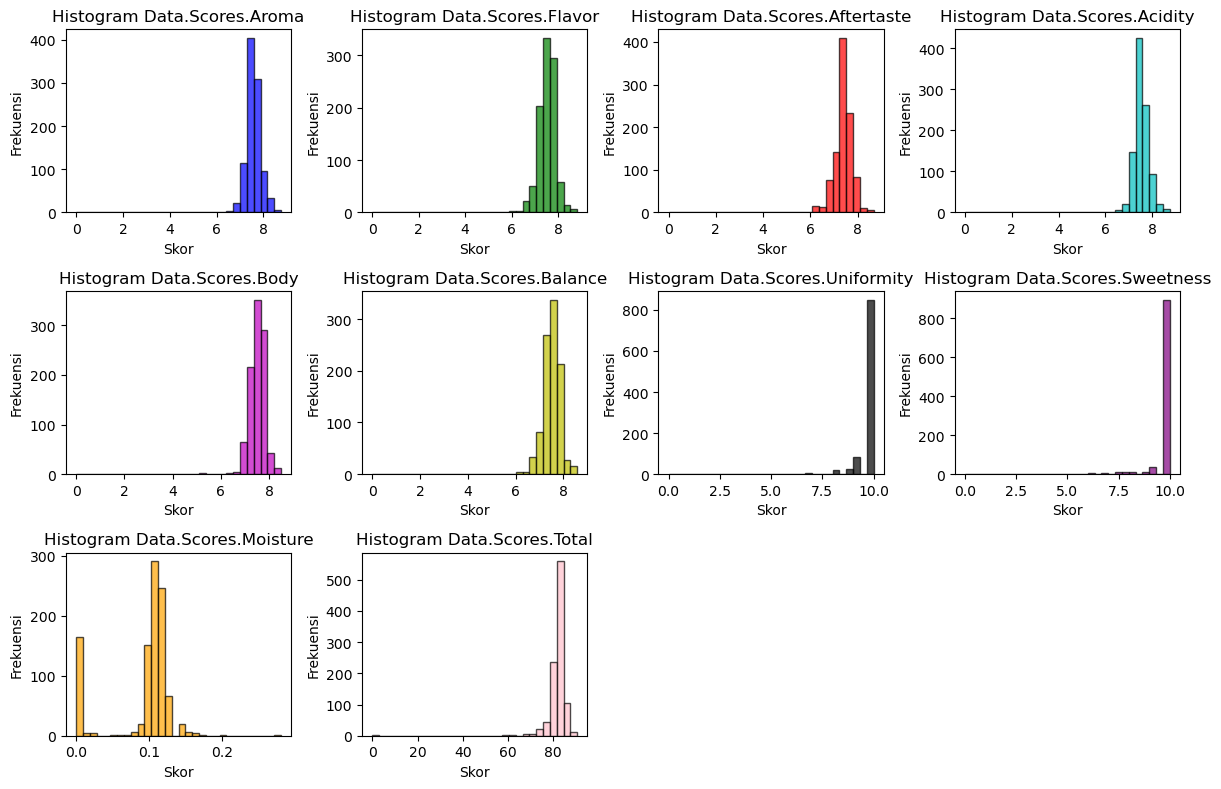

In [49]:
# Kolom-kolom skor yang akan dianalisis
columns_to_analyze = ['Data.Scores.Aroma', 'Data.Scores.Flavor', 'Data.Scores.Aftertaste', 'Data.Scores.Acidity', 'Data.Scores.Body',
                       'Data.Scores.Balance', 'Data.Scores.Uniformity', 'Data.Scores.Sweetness', 'Data.Scores.Moisture',
                       'Data.Scores.Total']

# Warna yang sesuai dengan setiap kolom skor
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink']

# Mengatur ukuran dan layout
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

# Membuat histogram untuk setiap kolom skor
for i, (column, color) in enumerate(zip(columns_to_analyze, colors), 1):

    plt.subplot(3, 4, i)
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7, color=color)
    plt.title(f'Histogram {column}')
    plt.xlabel('Skor')
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


*Description:*
> - dari data diatas kita dapat melihat distribusi dari aspek : Data skor aroma, Data skor rasa, Data skor kesan rasa dan juga aroma yang tertinggal setelah sajian kopi ditelan(aftertaste), Data skor keasaman, Data skor berat atau kekentalan kopi(body), Data skor dengan rasa nikmat kopi(balance), Data skor uji keseragaman rasa(uniformity), Data skor kemanisan, Data skor kelembaban, Data skor total.
> - visualisasi di atas dapat dilihat bagaimana frekuensi skor terdistribusi dan ada tren tertentu dalam penilaian kopi.

In [50]:
# Melihat nilai unik dalam kolom 'Data.Type.Species'
unique_species = df['Data.Type.Species'].unique()
print("Nilai unik dalam kolom 'Data.Type.Species':")
print(unique_species)

# Menghitung jumlah unik dari setiap nilai dalam kolom 'Data.Type.Species'
species_counts = df['Data.Type.Species'].value_counts()
print("Jumlah unik dalam kolom 'Data.Type.Species':")
print(species_counts)

Nilai unik dalam kolom 'Data.Type.Species':
['Arabica' 'Robusta']
Jumlah unik dalam kolom 'Data.Type.Species':
Data.Type.Species
Arabica    961
Robusta     28
Name: count, dtype: int64


2. Perbandingan total kopi berdasarkan tahun.

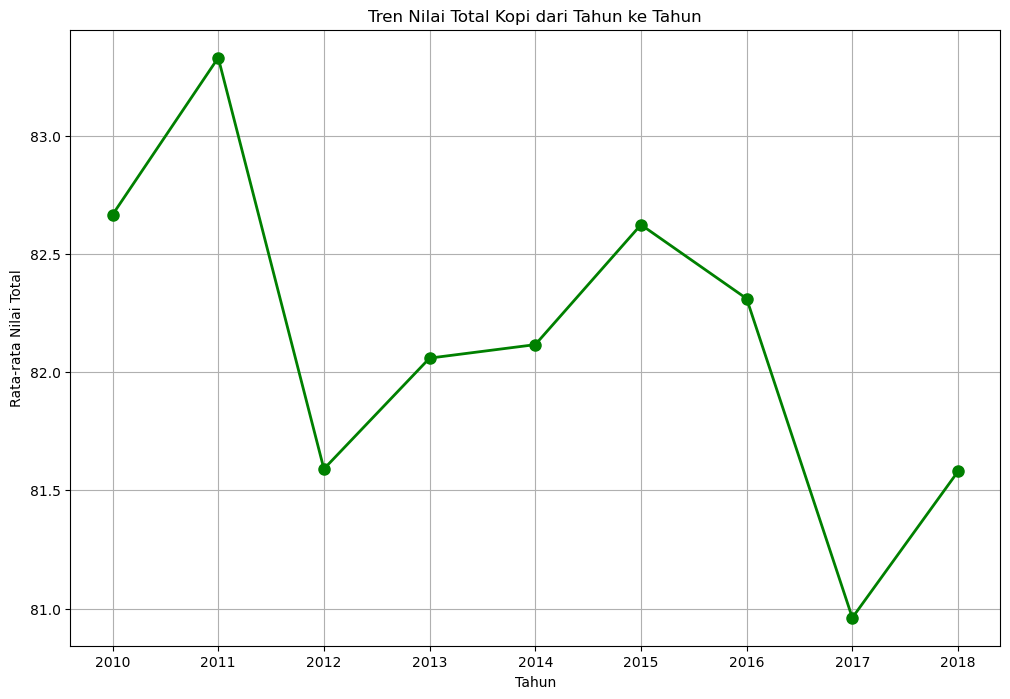

In [51]:
# Mengelompokkan data nilai total kopi berdasarkan tahun
yearly_scores_total = df.groupby('Year')['Data.Scores.Total'].mean()

# Mengatur ukuran dan layout plot
plt.figure(figsize=(12, 8))
yearly_scores_total.plot(kind='line', marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.title('Tren Nilai Total Kopi dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Nilai Total')

plt.grid()

plt.show()


*Description:*
> - dari visualisasi diatas dapat dilihat pada tahun 2011 memiliki nilai total kopi paling tinggi dari tahun tahun lain nya.
> - terdapat beberapa tahun tertentu mengalami penurunan yang signifikan. disebabkan beberapa faktor salah satu nya faktor rata rata ketinggian lokasi kopi.


In [52]:
# Melihat nilai unik dalam kolom 'Year'
unique_species = df['Year'].unique()
print("Nilai unik dalam kolom 'Year':")
print(unique_species)

# Menghitung jumlah unik dari setiap nilai dalam kolom 'Year'
species_counts = df['Year'].value_counts()
print("Jumlah unik dalam kolom 'Year':")
print(species_counts)

Nilai unik dalam kolom 'Year':
[2010 2011 2012 2013 2014 2015 2016 2017 2018]
Jumlah unik dalam kolom 'Year':
Year
2012    322
2014    195
2013    172
2015    104
2016     97
2017     62
2011     26
2010     10
2018      1
Name: count, dtype: int64


3. Untuk melihat tren produksi kopi dari tahun ke tahun.

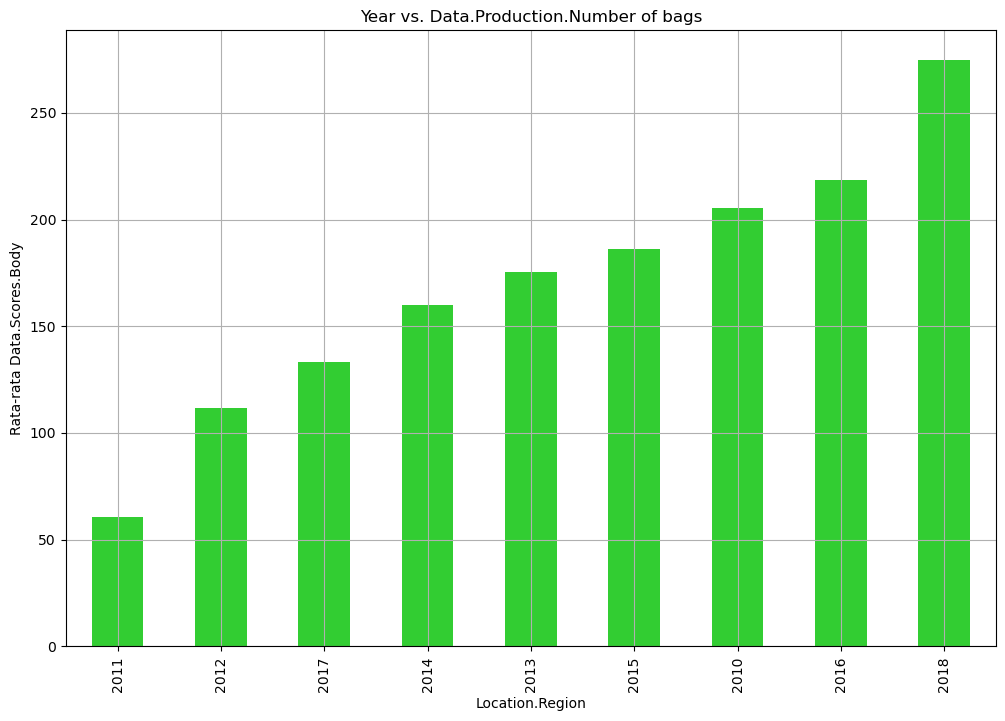

In [53]:
import matplotlib.pyplot as plt

# Mengatur ukuran dan layout plot
plt.figure(figsize=(12, 8))
# Year vs. Data.Production.Number of bags
# Membuat bar chart
df.groupby('Year')['Data.Production.Number of bags'].mean().sort_values().plot(kind='bar', color='limegreen')
plt.title('Year vs. Data.Production.Number of bags')
plt.xlabel('Location.Region')
plt.ylabel('Rata-rata Data.Scores.Body')

plt.grid()

plt.show()


*Description:*
> - setiap tahun mengalami kenaikan produksi kopi.
> - pada tahun 2018 memiliki produksi kopi paling tinggi dari tahun tahun lainnya.


4. Pendistribusian kopi terhadap setiap lokasi negara.

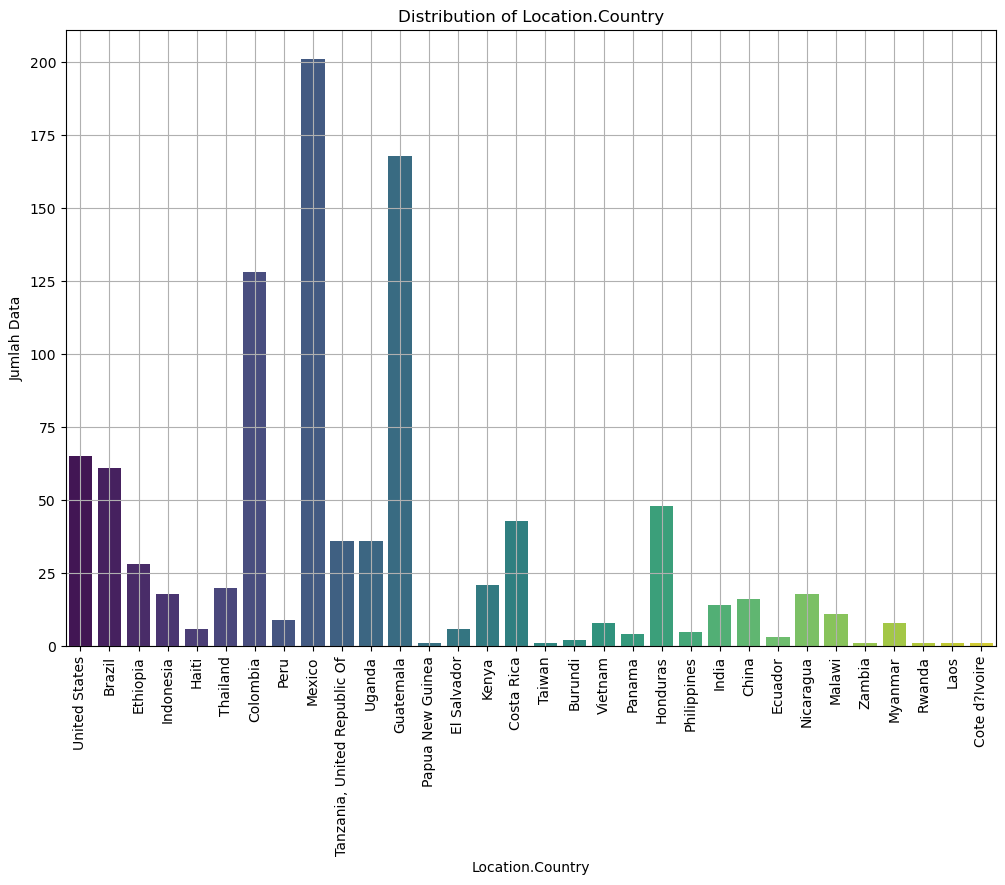

In [54]:
# Visualisasi distribusi untuk kolom 'Location.Country'
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Location.Country', palette='viridis')
plt.title('Distribution of Location.Country')
plt.xlabel('Location.Country')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=90)

plt.grid()

plt.show()


*Description:*
> - pendistribusian kopi paling banyak terdapat pada negara Mexico, Guatemala dan di ikuti beberapa negara lainnya.
> - beberapa negara seperti Rwanda, Zambia, Taiwan serta beebrapa negara lainnya dengan pendistribusian kopi paling sedikit. 
> - pendistribusian kopi pada beberapa negara dapat dilihat pada dibawah ini.

In [55]:
# Melihat nilai unik dalam kolom 'Location.Country'
unique_species = df['Location.Country'].unique()
print("Nilai unik dalam kolom 'Location.Country':")
print(unique_species)

# Menghitung jumlah unik dari setiap nilai dalam kolom 'Location.Country'
species_counts = df['Location.Country'].value_counts()
print("Jumlah unik dalam kolom 'Location.Country':")
print(species_counts)

Nilai unik dalam kolom 'Location.Country':
['United States' 'Brazil' 'Ethiopia' 'Indonesia' 'Haiti' 'Thailand'
 'Colombia' 'Peru' 'Mexico' 'Tanzania, United Republic Of' 'Uganda'
 'Guatemala' 'Papua New Guinea' 'El Salvador' 'Kenya' 'Costa Rica'
 'Taiwan' 'Burundi' 'Vietnam' 'Panama' 'Honduras' 'Philippines' 'India'
 'China' 'Ecuador' 'Nicaragua' 'Malawi' 'Zambia' 'Myanmar' 'Rwanda' 'Laos'
 'Cote d?Ivoire']
Jumlah unik dalam kolom 'Location.Country':
Location.Country
Mexico                          201
Guatemala                       168
Colombia                        128
United States                    65
Brazil                           61
Honduras                         48
Costa Rica                       43
Uganda                           36
Tanzania, United Republic Of     36
Ethiopia                         28
Kenya                            21
Thailand                         20
Nicaragua                        18
Indonesia                        18
China                   

5. Pendistribusian jenis metode pemprosesan kopi

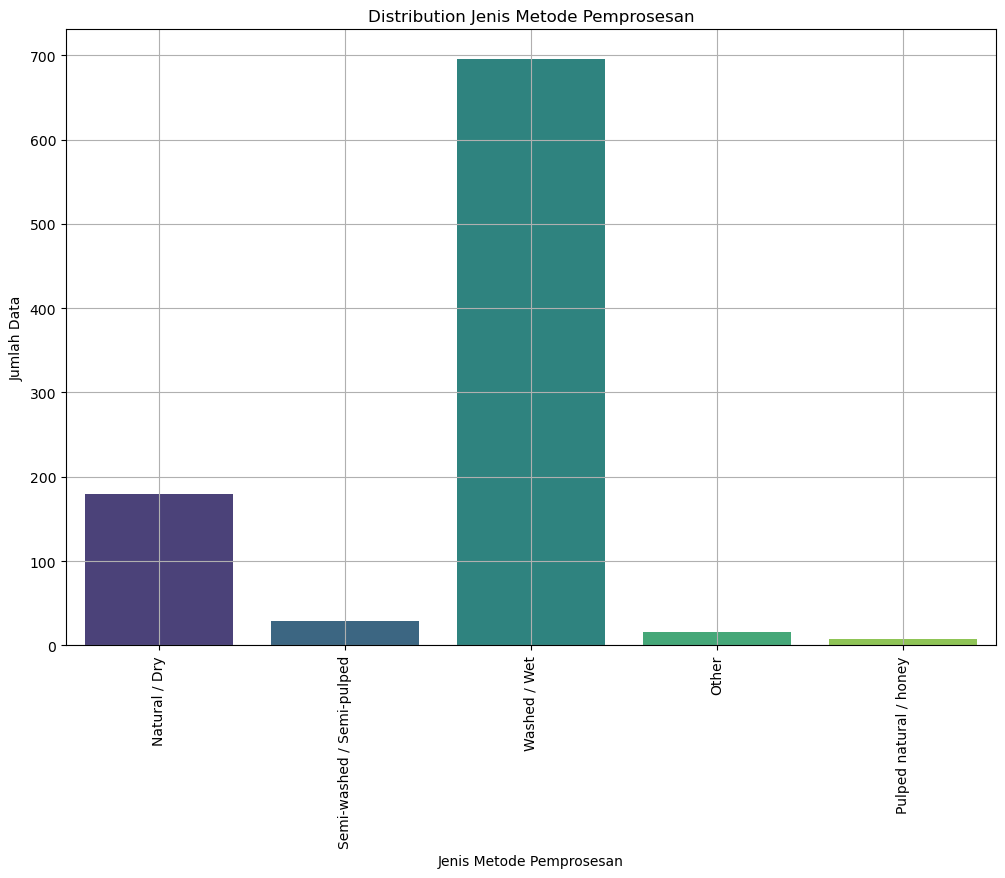

In [56]:
# Visualisasi distribusi untuk kolom Jenis Metode Pemprosesan
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Data.Type.Processing method', palette='viridis')
plt.title('Distribution Jenis Metode Pemprosesan')
plt.xlabel('Jenis Metode Pemprosesan')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=90)

plt.grid()

plt.show()


*Description:*
> - terdiri dari 5 jenis metode pemprosesan pada kopi.
> - pemprosesan washed / wet paling banyak di proses kopi nya dari pada yang lain.
> - untuk pemprosesan Pulped natural / honey paling sedikit dari yang lain.

In [57]:
# Melihat nilai unik dalam kolom 'Data.Type.Processing method'
unique_species = df['Data.Type.Processing method'].unique()
print("Nilai unik dalam kolom 'Data.Type.Processing method':")
print(unique_species)

# Menghitung jumlah unik dari setiap nilai dalam kolom 'Data.Type.Processing method'
species_counts = df['Data.Type.Processing method'].value_counts()
print("Jumlah unik dalam kolom 'Data.Type.Processing method':")
print(species_counts)

Nilai unik dalam kolom 'Data.Type.Processing method':
[nan 'Natural / Dry' 'Semi-washed / Semi-pulped' 'Washed / Wet' 'Other'
 'Pulped natural / honey']
Jumlah unik dalam kolom 'Data.Type.Processing method':
Data.Type.Processing method
Washed / Wet                 696
Natural / Dry                179
Semi-washed / Semi-pulped     29
Other                         16
Pulped natural / honey         7
Name: count, dtype: int64


6. Pendistribusian jenis variasi kopi

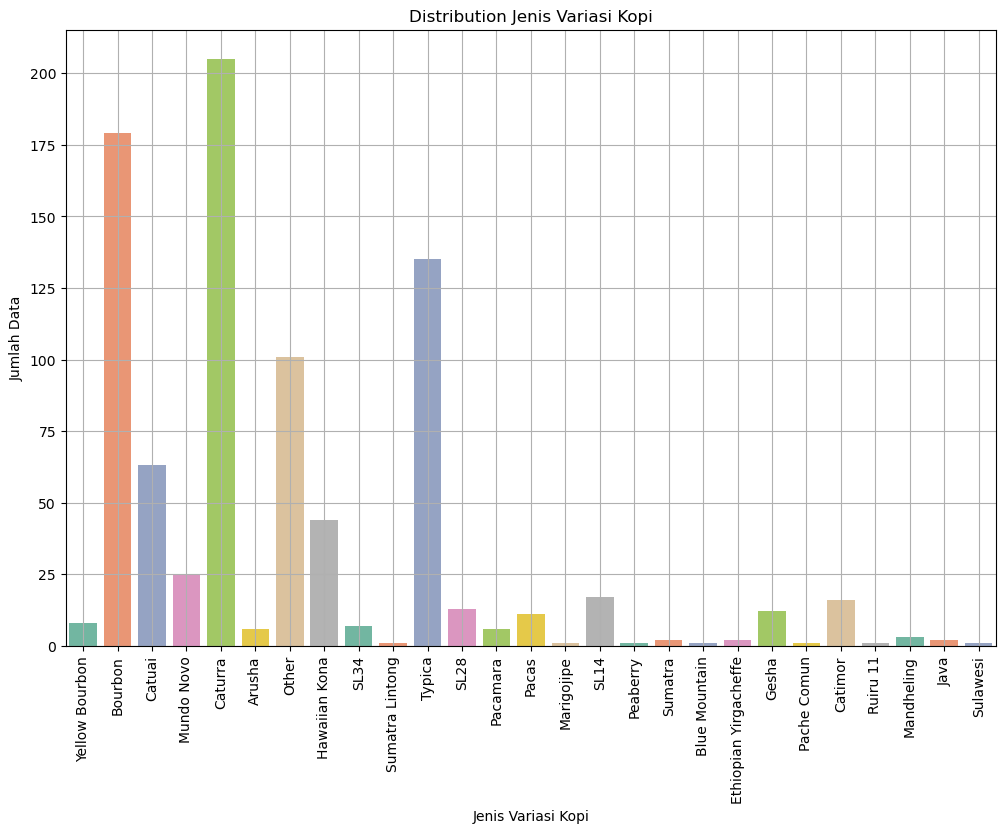

In [58]:
# Visualisasi distribusi untuk kolom Jenis Variasi Kopi
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Data.Type.Variety', palette='Set2')
plt.title('Distribution Jenis Variasi Kopi')
plt.xlabel('Jenis Variasi Kopi')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=90)

plt.grid()

plt.show()


*Description:*
> - ada beberapa jenis jenis variasi dalam kopi seperti data diatas.
> - untuk jenis kopi Caturra paling banyak diminati dari kopi lainnya.
> - untuk jenis kopi sulawesi, peaberry dan beberapa kopi lainnya paling sedikit diminati.
> - dibawah ini beberapa jenis kopi yang ada.

In [59]:
# Melihat nilai unik dalam kolom 'Data.Type.Variety'
unique_species = df['Data.Type.Variety'].unique()
print("Nilai unik dalam kolom 'Data.Type.Variety':")
print(unique_species)

# Menghitung jumlah unik dari setiap nilai dalam kolom 'Data.Type.Variety'
species_counts = df['Data.Type.Variety'].value_counts()
print("Jumlah unik dalam kolom 'Data.Type.Variety':")
print(species_counts)

Nilai unik dalam kolom 'Data.Type.Variety':
[nan 'Yellow Bourbon' 'Bourbon' 'Catuai' 'Mundo Novo' 'Caturra' 'Arusha'
 'Other' 'Hawaiian Kona' 'SL34' 'Sumatra Lintong' 'Typica' 'SL28'
 'Pacamara' 'Pacas' 'Marigojipe' 'SL14' 'Peaberry' 'Sumatra'
 'Blue Mountain' 'Ethiopian Yirgacheffe' 'Gesha' 'Pache Comun' 'Catimor'
 'Ruiru 11' 'Mandheling' 'Java' 'Sulawesi']
Jumlah unik dalam kolom 'Data.Type.Variety':
Data.Type.Variety
Caturra                  205
Bourbon                  179
Typica                   135
Other                    101
Catuai                    63
Hawaiian Kona             44
Mundo Novo                25
SL14                      17
Catimor                   16
SL28                      13
Gesha                     12
Pacas                     11
Yellow Bourbon             8
SL34                       7
Pacamara                   6
Arusha                     6
Mandheling                 3
Sumatra                    2
Ethiopian Yirgacheffe      2
Java                     

7. Heatmap korelasi Coffee

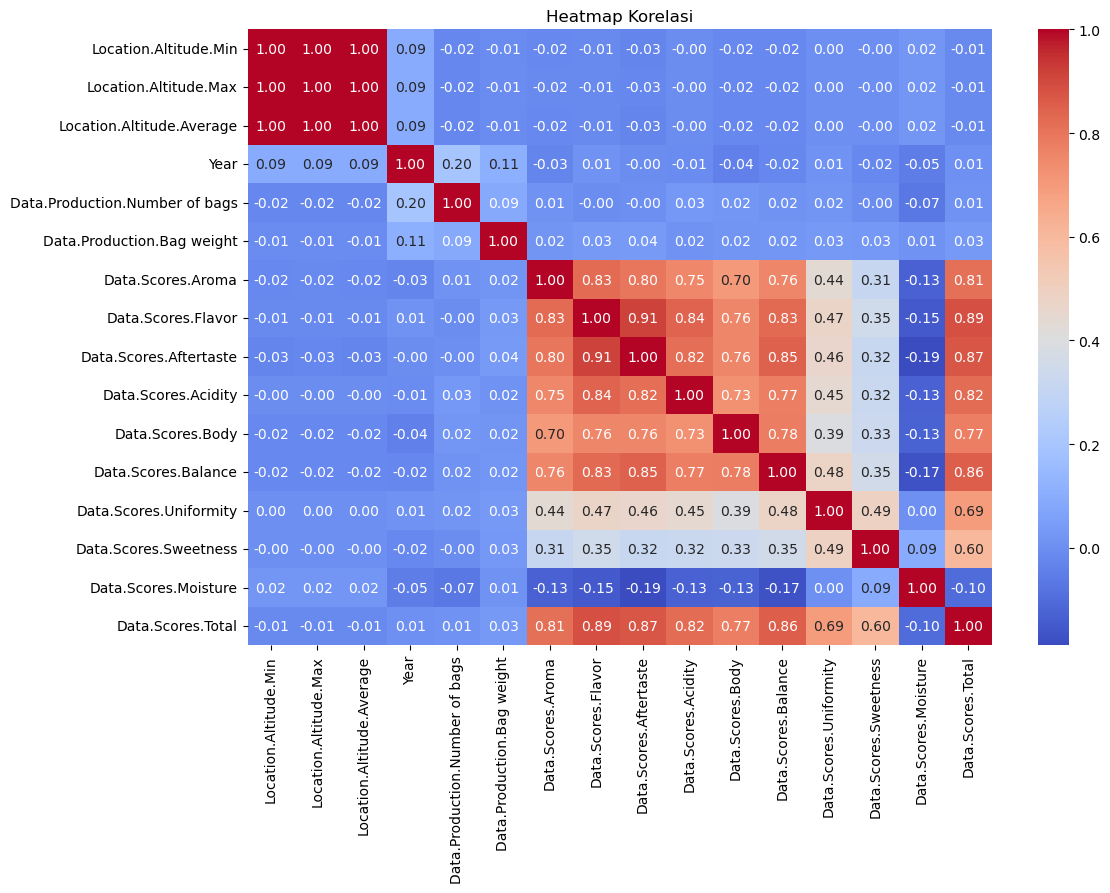

In [60]:
# Menghilangkan kolom objek (non-numerik)
numerical_df = df.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()


*Description:*
> - untuk korelasi positif dengan warna terang.
> - untuk korelasi negatif dengan warna lebih gelap.

### ***Handling Missing Value***

In [61]:
df.isna().sum()

Location.Country                    0
Location.Region                    36
Location.Altitude.Min               0
Location.Altitude.Max               0
Location.Altitude.Average           0
Year                                0
Data.Owner                          5
Data.Type.Species                   0
Data.Type.Variety                 125
Data.Type.Processing method        62
Data.Production.Number of bags      0
Data.Production.Bag weight          0
Data.Scores.Aroma                   0
Data.Scores.Flavor                  0
Data.Scores.Aftertaste              0
Data.Scores.Acidity                 0
Data.Scores.Body                    0
Data.Scores.Balance                 0
Data.Scores.Uniformity              0
Data.Scores.Sweetness               0
Data.Scores.Moisture                0
Data.Scores.Total                   0
Data.Color                         47
dtype: int64

*Description:*
> - terdapat missing value pada kolom Location.Region , Data.Type.Variety , Data.Type.Processing method , dan Data.Color .

In [62]:
# Menghapus missing value
df.dropna(inplace=True)

In [63]:
df.isna().sum()

Location.Country                  0
Location.Region                   0
Location.Altitude.Min             0
Location.Altitude.Max             0
Location.Altitude.Average         0
Year                              0
Data.Owner                        0
Data.Type.Species                 0
Data.Type.Variety                 0
Data.Type.Processing method       0
Data.Production.Number of bags    0
Data.Production.Bag weight        0
Data.Scores.Aroma                 0
Data.Scores.Flavor                0
Data.Scores.Aftertaste            0
Data.Scores.Acidity               0
Data.Scores.Body                  0
Data.Scores.Balance               0
Data.Scores.Uniformity            0
Data.Scores.Sweetness             0
Data.Scores.Moisture              0
Data.Scores.Total                 0
Data.Color                        0
dtype: int64

*Description:*
> - tidak terdapat missing value.

### ***Membagi data menjadi Numerical dan Categorical***
Membagi data menjadi Numerical dan Categorical

**Data categorical:** 
- *Data yang mempresentasikan kategori atau kelompok dan tidak memiliki nilai yang dapat diukur secara numerik.*

**Data Numerical:**
- *Data numerical mengandung nilai yang dapat diukur atau dihitung secara matematis.*

In [64]:
# Divide category columns into cat_cols
cat_cols = df[['Location.Country','Location.Region','Data.Owner','Data.Type.Species', 'Data.Type.Variety', 'Data.Type.Processing method',
               'Data.Color']]
# Divide numeric columns into num_cols
num_cols = df[['Location.Altitude.Min', 'Location.Altitude.Max', 'Location.Altitude.Average', 'Year', 'Data.Scores.Flavor',
               'Data.Scores.Aftertaste', 'Data.Scores.Acidity', 'Data.Scores.Body', 'Data.Scores.Balance', 'Data.Scores.Uniformity',
               'Data.Scores.Sweetness', 'Data.Scores.Moisture', 'Data.Scores.Total']]

In [65]:
# Show categorical dataframe
cat_cols.head()

,Location.Country,Location.Region,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,Data.Color
10,Brazil,south of minas,nucoffee,Arabica,Bourbon,Natural / Dry,Green
11,Brazil,vale da grama,nucoffee,Arabica,Bourbon,Natural / Dry,Green
12,Brazil,south of minas,nucoffee,Arabica,Bourbon,Semi-washed / Semi-pulped,Blue-Green
13,Brazil,south of minas,nucoffee,Arabica,Bourbon,Semi-washed / Semi-pulped,Blue-Green
14,Brazil,south of minas,nucoffee,Arabica,Bourbon,Natural / Dry,Green


In [66]:
# Show numerikal dataframe
num_cols.head()

,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total
10,1250,1250,1250,2011,8.50,8.00,8.00,8.00,8.00,10.0,10.0,0.12,86.92
11,1300,1300,1300,2011,8.17,8.00,7.75,8.00,8.00,10.0,10.0,0.12,86.42
12,1250,1250,1250,2011,8.00,8.00,8.00,7.75,8.00,10.0,10.0,0.11,86.08
13,1250,1250,1250,2011,8.00,8.00,7.67,7.75,8.00,10.0,10.0,0.11,85.42
14,1200,1200,1200,2011,7.92,7.75,7.75,8.00,7.75,10.0,10.0,0.11,84.92


### ***Cardinality Handling***

In [67]:
# Handling cardinality hanya untuk column categorical
for x in cat_cols.columns:
    print(f'Cardinality Column {x}:', cat_cols[x].nunique())

Cardinality Column Location.Country: 29
Cardinality Column Location.Region: 228
Cardinality Column Data.Owner: 217
Cardinality Column Data.Type.Species: 2
Cardinality Column Data.Type.Variety: 27
Cardinality Column Data.Type.Processing method: 5
Cardinality Column Data.Color: 4


*Description:*
> - column Location.Region memiliki Cardinality sebesar 228, termasuk high cardinality.
> - column Data.Type.Species memiliki Cardinality rendah, termasuk low cardinality.

In [68]:
# Handling cardinality hanya untuk column numerical
for x in num_cols.columns:
    print(f'Cardinality Column {x}:', num_cols[x].nunique())

Cardinality Column Location.Altitude.Min: 127
Cardinality Column Location.Altitude.Max: 126
Cardinality Column Location.Altitude.Average: 135
Cardinality Column Year: 8
Cardinality Column Data.Scores.Flavor: 31
Cardinality Column Data.Scores.Aftertaste: 29
Cardinality Column Data.Scores.Acidity: 27
Cardinality Column Data.Scores.Body: 25
Cardinality Column Data.Scores.Balance: 28
Cardinality Column Data.Scores.Uniformity: 7
Cardinality Column Data.Scores.Sweetness: 10
Cardinality Column Data.Scores.Moisture: 10
Cardinality Column Data.Scores.Total: 143


*Description:*
> - column Data.Scores.Total memiliki Cardinality sebesar 143, termasuk high cardinality.
> - column Data.Scores.Uniformity memiliki Cardinality rendah, termasuk low cardinality.

In [69]:
# Melihat jumlah dari unique value column area
print(cat_cols.value_counts())

Location.Country  Location.Region   Data.Owner                                 Data.Type.Species  Data.Type.Variety  Data.Type.Processing method  Data.Color
Guatemala         oriente           juan luis alvarado romero                  Arabica            Bourbon            Washed / Wet                 Green         53
Colombia          huila             racafe & cia s.c.a                         Arabica            Caturra            Washed / Wet                 Green         30
                                    exportadora de cafe condor s.a             Arabica            Caturra            Washed / Wet                 Green         22
Honduras          marcala           cadexsa                                    Arabica            Catuai             Washed / Wet                 Green         12
Guatemala         san marcos        juan luis alvarado romero                  Arabica            Bourbon            Washed / Wet                 Green         10
                            

In [70]:
# Melihat jumlah dari unique value column area
print(num_cols.value_counts())

Location.Altitude.Min  Location.Altitude.Max  Location.Altitude.Average  Year  Data.Scores.Flavor  Data.Scores.Aftertaste  Data.Scores.Acidity  Data.Scores.Body  Data.Scores.Balance  Data.Scores.Uniformity  Data.Scores.Sweetness  Data.Scores.Moisture  Data.Scores.Total
0                      0                      0                          2011  7.33                7.17                    7.25                 7.33              7.67                 10.0                    10.0                   0.13                  80.75                1
1500                   1500                   1500                       2015  7.67                7.58                    7.92                 7.83              7.58                 10.0                    10.0                   0.13                  83.50                1
                                                                         2016  7.67                7.58                    7.92                 7.67              7.83              

### ***Feature Selection***

In [71]:
# Membagi column categorical dan numerical
cols_num = ['Data.Scores.Total', 'Data.Scores.Aroma','Data.Scores.Flavor','Data.Scores.Aftertaste', 'Data.Scores.Acidity', 'Data.Scores.Body', 'Data.Scores.Sweetness', 'Data.Scores.Moisture']
cols_cat = ['Year','Data.Production.Bag weight','Data.Production.Number of bags', 'Data.Scores.Total']

<Axes: >

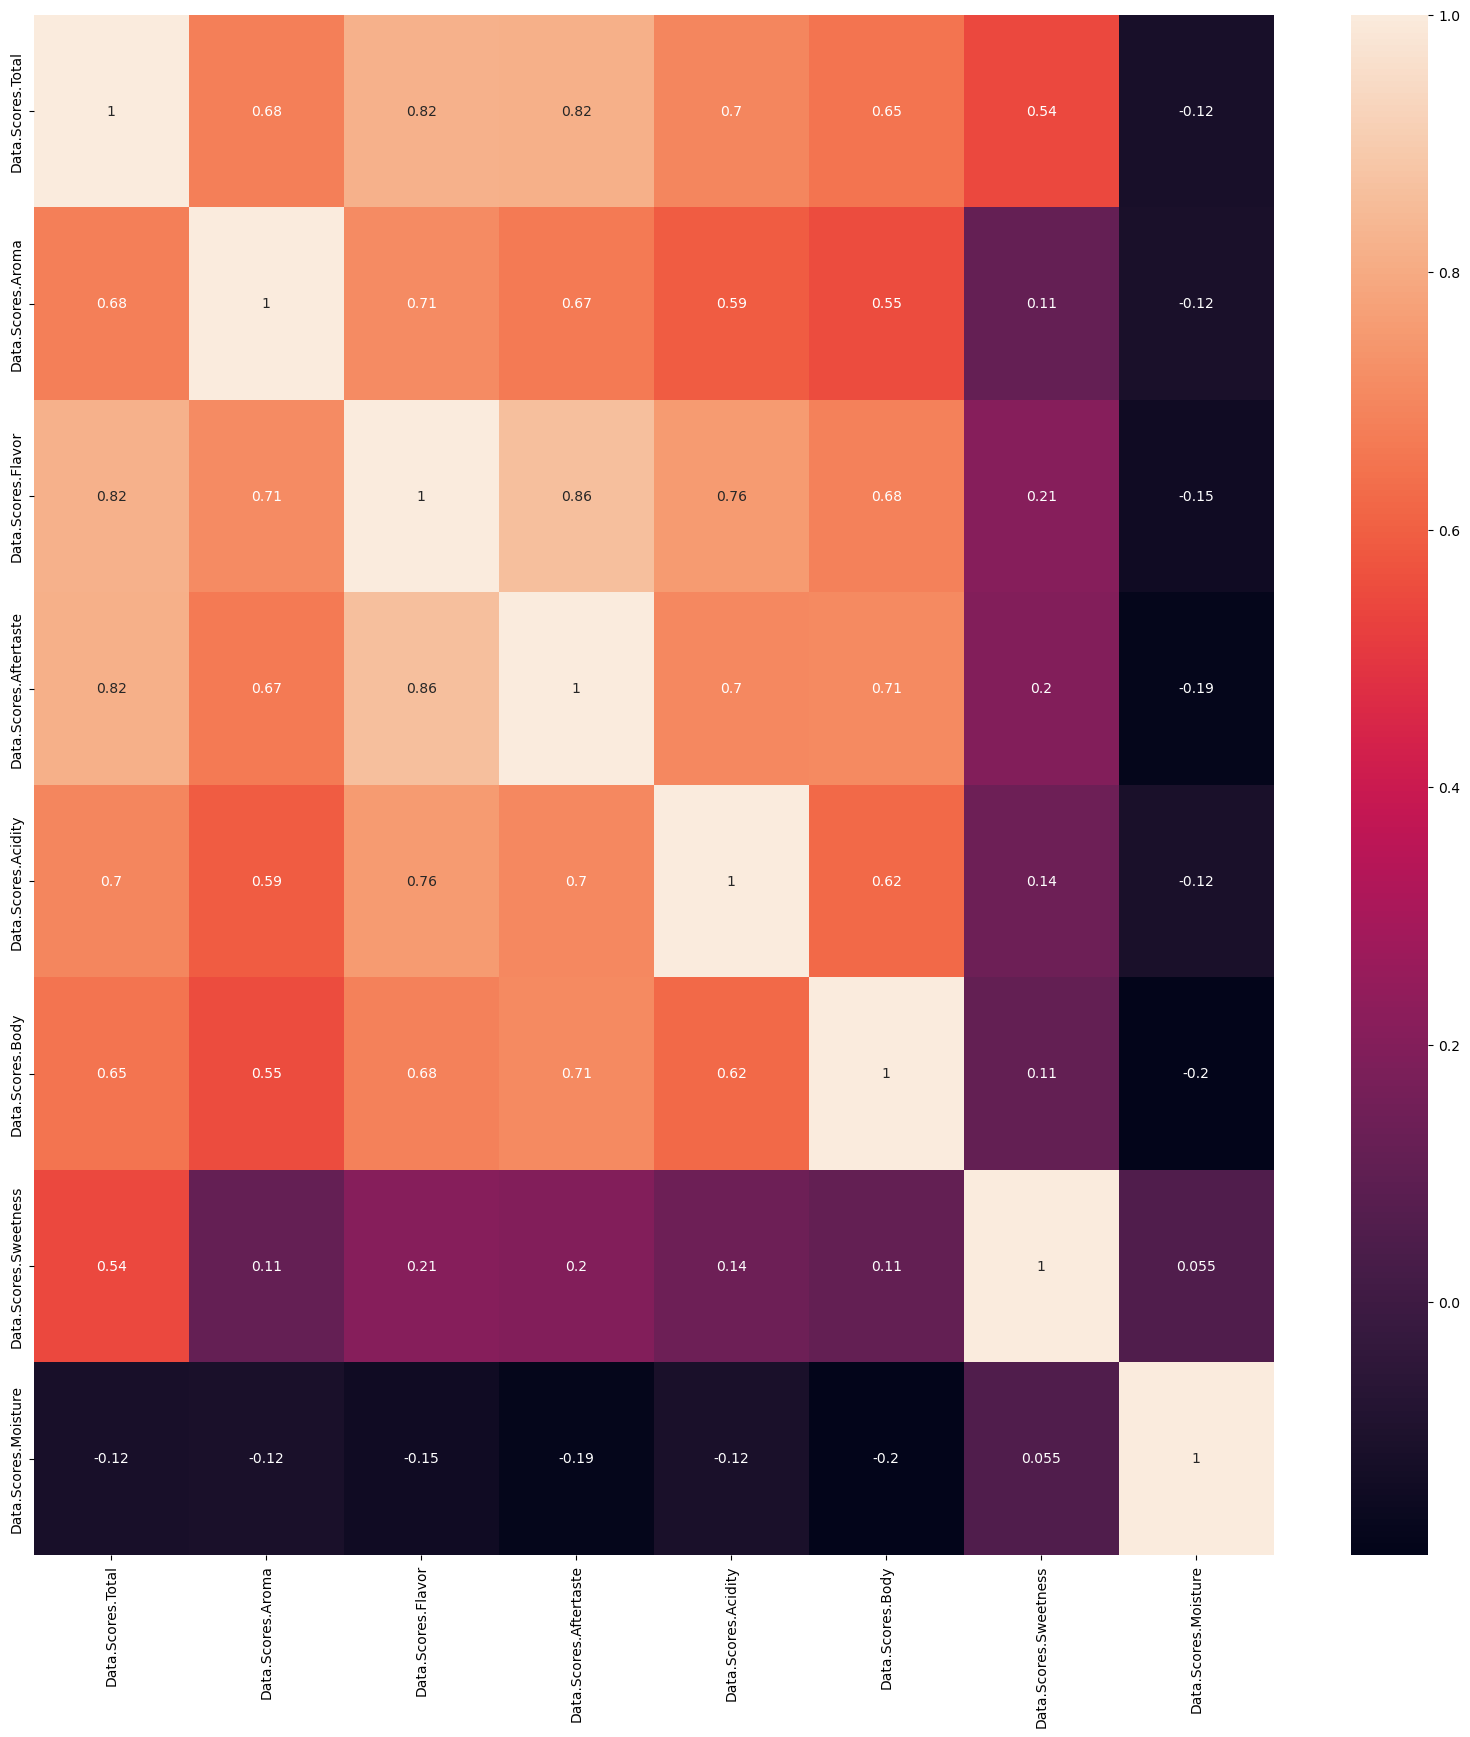

In [72]:
# Melakukan plot temp_numeric_cols kedalam heatmap
plt.figure(figsize=(20,20)) 
sns.heatmap(df[cols_num].corr(method='pearson'),annot=True)

### ***Split Between X (features) and y (target)***

In [73]:
# Splitting between X dan y
X = df.drop(['Data.Scores.Total'], axis= 1)
y = df['Data.Scores.Total']
X.head(5)

,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Aroma,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Color
10,Brazil,south of minas,1250,1250,1250,2011,nucoffee,Arabica,Bourbon,Natural / Dry,...,8.50,8.50,8.00,8.00,8.00,8.00,10.0,10.0,0.12,Green
11,Brazil,vale da grama,1300,1300,1300,2011,nucoffee,Arabica,Bourbon,Natural / Dry,...,8.50,8.17,8.00,7.75,8.00,8.00,10.0,10.0,0.12,Green
12,Brazil,south of minas,1250,1250,1250,2011,nucoffee,Arabica,Bourbon,Semi-washed / Semi-pulped,...,8.33,8.00,8.00,8.00,7.75,8.00,10.0,10.0,0.11,Blue-Green
13,Brazil,south of minas,1250,1250,1250,2011,nucoffee,Arabica,Bourbon,Semi-washed / Semi-pulped,...,8.00,8.00,8.00,7.67,7.75,8.00,10.0,10.0,0.11,Blue-Green
14,Brazil,south of minas,1200,1200,1200,2011,nucoffee,Arabica,Bourbon,Natural / Dry,...,8.00,7.92,7.75,7.75,8.00,7.75,10.0,10.0,0.11,Green


### ***Split between Train-set and Test-set***

In [74]:
# Splitting antara Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20)

print('Train size', X_train.shape)
print('Test size', X_test.shape)
X_train.head(5)

Train size (636, 22)
Test size (160, 22)


,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,...,Data.Scores.Aroma,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Color
231,Mexico,la concordia,1550,1550,1550,2012,armando luis pohlenz martinez,Arabica,Caturra,Washed / Wet,...,7.33,7.42,7.33,7.67,7.42,7.25,10.0,10.00,0.12,Green
757,Colombia,santander,1650,1650,1650,2015,exportadora de cafe condor s.a,Arabica,Caturra,Washed / Wet,...,7.67,7.75,7.42,7.83,7.83,7.42,10.0,10.00,0.11,Green
238,United States,kona,0,0,0,2012,kona pacific farmers cooperative,Arabica,Hawaiian Kona,Washed / Wet,...,7.42,7.33,7.33,7.33,7.17,7.83,10.0,10.00,0.10,Green
84,Ethiopia,"ethiopia, sidamo",1800,1800,1800,2012,steven kil,Arabica,Other,Natural / Dry,...,7.92,7.92,7.83,8.00,7.92,7.92,10.0,8.67,0.09,Unknown
179,Mexico,xalapa,1170,1170,1170,2012,manuel herrera juarez,Arabica,Caturra,Washed / Wet,...,7.75,7.33,7.25,7.58,7.58,7.33,10.0,10.00,0.13,Green


In [75]:
# Membagi lagi data test dan train ke data kategorikal dan data numerikal
# Data train numerikal
X_train_num = X_train[['Data.Scores.Aroma','Data.Scores.Flavor','Data.Scores.Aftertaste', 'Data.Scores.Acidity', 'Data.Scores.Body', 'Data.Scores.Sweetness', 'Data.Scores.Moisture']]
# Data test numerikal
X_test_num = X_test[['Data.Scores.Aroma','Data.Scores.Flavor','Data.Scores.Aftertaste', 'Data.Scores.Acidity', 'Data.Scores.Body', 'Data.Scores.Sweetness', 'Data.Scores.Moisture']]
X_test_num.head()

,Data.Scores.Aroma,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Sweetness,Data.Scores.Moisture
341,7.17,7.17,6.83,7.17,7.42,10.0,0.13
637,7.42,7.33,7.42,7.42,7.50,10.0,0.12
435,7.83,7.50,7.42,7.58,7.42,10.0,0.12
89,7.67,7.75,7.58,7.67,7.75,10.0,0.12
848,7.75,7.92,7.58,7.92,7.67,10.0,0.10


In [76]:
# Data train categorical
X_train_cat = X_train[['Year','Data.Production.Bag weight','Data.Production.Number of bags']]
# Data test categorical
X_test_cat = X_test[['Year','Data.Production.Bag weight','Data.Production.Number of bags']]
X_train_cat.head()

,Year,Data.Production.Bag weight,Data.Production.Number of bags
231,2012,1.0000,250
757,2015,70.0000,275
238,2012,45.3592,13
84,2012,60.0000,100
179,2012,1.0000,10


### ***Handling Outlier***

***Cek Skewness***

In [77]:
# # Numeric columns
# num_cols = df[['Location.Altitude.Min', 'Location.Altitude.Max', 'Location.Altitude.Average', 'Year', 'Data.Scores.Flavor',
#                'Data.Scores.Aftertaste', 'Data.Scores.Acidity', 'Data.Scores.Body', 'Data.Scores.Balance', 'Data.Scores.Uniformity',
#                'Data.Scores.Sweetness', 'Data.Scores.Moisture', 'Data.Scores.Total']]

In [78]:
# Menghitung niai skewness numerical
for i in X_train_num:
    skew = X_train_num[i].skew()
    print('Skewness of column', i, 'is', skew)

Skewness of column Data.Scores.Aroma is -0.9223321353054613
Skewness of column Data.Scores.Flavor is -0.47806221119651426
Skewness of column Data.Scores.Aftertaste is -0.509255171925426
Skewness of column Data.Scores.Acidity is -0.06647418133993906
Skewness of column Data.Scores.Body is -0.21988322207322836
Skewness of column Data.Scores.Sweetness is -9.290708528919353
Skewness of column Data.Scores.Moisture is -1.7509626549288466


In [79]:
# Melihat nialai mana yang terdistribusi normal dan skewed
# Untuk menampung kolom yang masuk dalam skewness normal
normal = []
# Untuk menampung kolom yang masuk dalam skewness skewed  
skewed = []  

# Untuk mencari kolom mana yang skewed atau normal
for column in X_train_num.columns:  
    skewness = X_train_num[column].skew()
# Syarat
    if skewness < -0.5 or skewness > 0.5:  
# Memasukan ke variabel penampung skewed
        skewed.append(column)
# Syarat  
    elif skewness >= -0.5 or skewness <= 0.5:  
# Memasukan ke variabel penampung normal
        normal.append(column)  

print (f'Kolom yang termasuk distribusi normal adalah {normal}')
print (f'Kolom yang termasuk distribusi skewed adalah {skewed}')

Kolom yang termasuk distribusi normal adalah ['Data.Scores.Flavor', 'Data.Scores.Acidity', 'Data.Scores.Body']
Kolom yang termasuk distribusi skewed adalah ['Data.Scores.Aroma', 'Data.Scores.Aftertaste', 'Data.Scores.Sweetness', 'Data.Scores.Moisture']


In [80]:
# Melihat jumlah outlier pada setiap column di X_train_num
threshold = 3
outlier_counts = {}

for col in X_train_num.columns:
    data_skew = X_train_num[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    outlier_counts[col] = len(outliers[0])

for col, count in outlier_counts.items():
    print(f"Jumlah outlier dalam kolom {col}: {count} outlier")

Jumlah outlier dalam kolom Data.Scores.Aroma: 5 outlier
Jumlah outlier dalam kolom Data.Scores.Flavor: 8 outlier
Jumlah outlier dalam kolom Data.Scores.Aftertaste: 13 outlier
Jumlah outlier dalam kolom Data.Scores.Acidity: 5 outlier
Jumlah outlier dalam kolom Data.Scores.Body: 6 outlier
Jumlah outlier dalam kolom Data.Scores.Sweetness: 13 outlier
Jumlah outlier dalam kolom Data.Scores.Moisture: 0 outlier


In [81]:
# Melihat presentase outlier pada column X_train_num
# Menetapkan batas untuk mengidentifikasi Outlier
threshold = 3

# Menginisialkan untuk menyimpan percentages outlier untuk setiap column numerik
outlier_percentages = {}

# Lakukan perulangan melalui setiap column dalam X_train_num
for col in X_train_num.columns:
    data_skew = X_train_num[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    # Mengidentifikasikan Outlier berdasarkan ambang batas
    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    # Menghitung persentase outliers
    total_data_points = len(data_skew)
    percentage = (len(outliers[0]) / total_data_points) * 100
    
    # Menyimpan persentase Outlier dalam dictionary
    outlier_percentages[col] = percentage

# Print percentage Outlier untuk setiap column
for col, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in column {col}: {percentage:.2f}%")

Percentage of outliers in column Data.Scores.Aroma: 0.79%
Percentage of outliers in column Data.Scores.Flavor: 1.26%
Percentage of outliers in column Data.Scores.Aftertaste: 2.04%
Percentage of outliers in column Data.Scores.Acidity: 0.79%
Percentage of outliers in column Data.Scores.Body: 0.94%
Percentage of outliers in column Data.Scores.Sweetness: 2.04%
Percentage of outliers in column Data.Scores.Moisture: 0.00%


*Description:*
> - karena nilai Skewnees dari Data.Scores.Aroma dan Data.Scores.Flavor paling jauh, maka saya melakukan capping.

Numorical Column

Before - After Capping


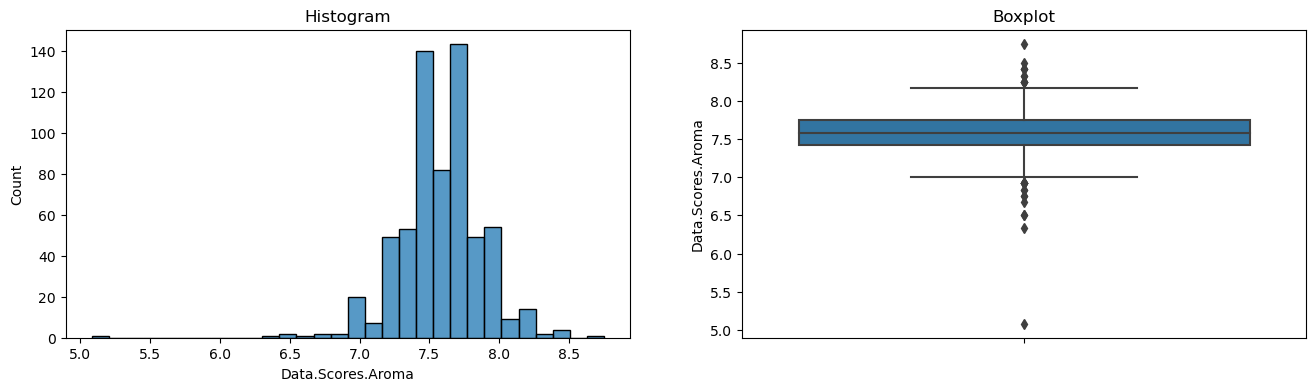

In [82]:
# Buat function membuat histogram dan boxplot, untuk lihat perubahan setelah capping 
def capping_plot(df, variable):
    # Definisikan figure size
    plt.figure(figsize=(16, 4))

    # membuat Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df['Data.Scores.Aroma'], bins=30)
    plt.title('Histogram')

    # membuat Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['Data.Scores.Aroma'])
    plt.title('Boxplot')

    plt.show()

# Melihat histogram dan boxplot yang sudah di capping
print('Numorical Column')
print('\nBefore - After Capping')
capping_plot(X_train, 'Data.Scores.Aroma')

Numorical Column

Before - After Capping


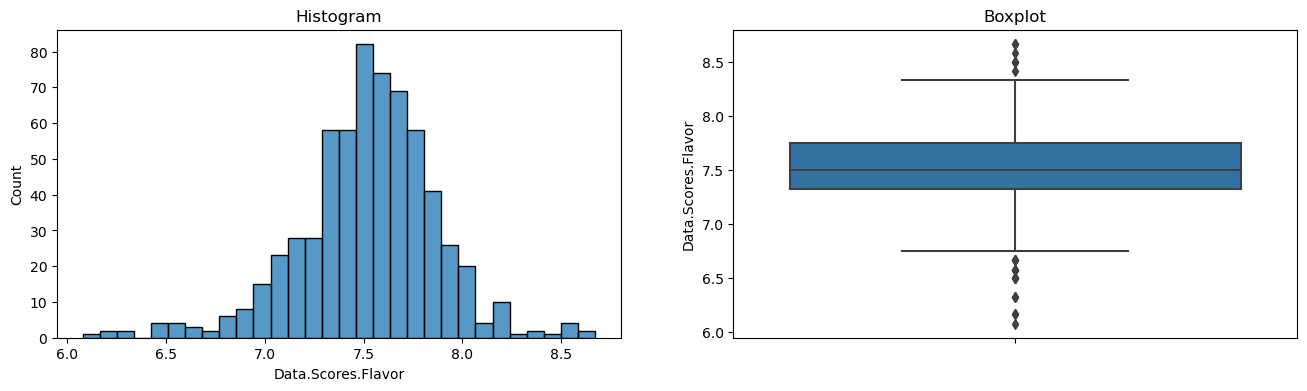

In [83]:
# Buat function membuat histogram dan boxplot, untuk lihat perubahan setelah capping 
def capping_plot(df, variable):
    # Definisikan figure size
    plt.figure(figsize=(16, 4))

    # membuat Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df['Data.Scores.Flavor'], bins=30)
    plt.title('Histogram')

    # membuat Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['Data.Scores.Flavor'])
    plt.title('Boxplot')

    plt.show()

# Melihat histogram dan boxplot yang sudah di capping
print('Numorical Column')
print('\nBefore - After Capping')
capping_plot(X_train, 'Data.Scores.Flavor')

In [84]:
winsoriser = Winsorizer(capping_method='iqr', # gaussian itu distribusi normal
                             tail='both', #capping 2 sisi outlier
                             fold=1.5, # rumus gaussian
                             variables=['Data.Scores.Aroma', 'Data.Scores.Flavor'])

winsoriser.fit(X_train)

X_train = winsoriser.fit_transform(X_train)
X_test = winsoriser.transform(X_test)
winsoriser.right_tail_caps_

{'Data.Scores.Aroma': 8.245000000000001,
 'Data.Scores.Flavor': 8.379999999999999}

### ***Feature Selection***

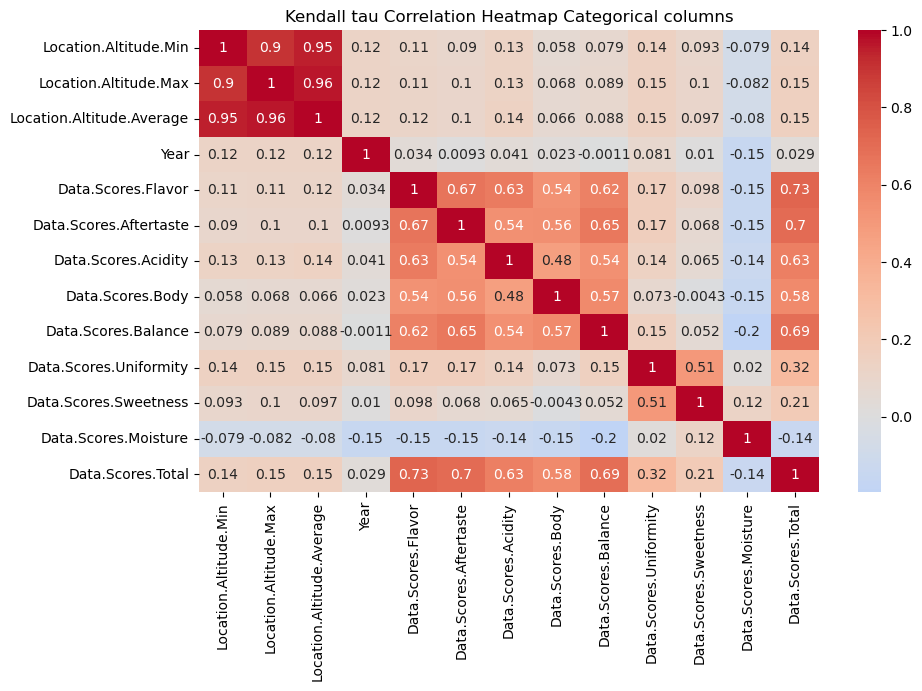

In [85]:
kendall_corr_matrix = num_cols.corr(method=lambda x, y: kendalltau(x, y).correlation)

plt.figure(figsize=(10, 6))
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Kendall tau Correlation Heatmap Categorical columns')
plt.show()

In [86]:
# # Memasukan feature selected kedalam dataframe baru
# ftr_selected = df_duplicate[['price','view','bedrooms','bathrooms','sqft_living','floors','sqft_above','sqft_basement','condition']]
# ftr_selected['area'] = cat_cols['area']
# ftr_selected.head()

### ***Check VIF***

In [87]:
X = df[['Data.Scores.Aroma','Data.Scores.Flavor','Data.Scores.Aftertaste', 'Data.Scores.Acidity', 'Data.Scores.Body', 'Data.Scores.Sweetness', 'Data.Scores.Moisture']]

# Menghitung VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 Variable          VIF
0       Data.Scores.Aroma  1190.182200
1      Data.Scores.Flavor  2668.540906
2  Data.Scores.Aftertaste  2090.424168
3     Data.Scores.Acidity  1479.685338
4        Data.Scores.Body  1414.374001
5   Data.Scores.Sweetness   338.304267
6    Data.Scores.Moisture     6.655072


### ***Membuat Pipeline Untuk Preprocessing***

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define column numerik yang akan di proses pada features numerik 
num_features = 'Data.Scores.Aroma','Data.Scores.Flavor','Data.Scores.Aftertaste', 'Data.Scores.Acidity', 'Data.Scores.Body', 'Data.Scores.Sweetness', 'Data.Scores.Moisture'

# Membuat numeric transformer pipeline
num_transformer = Pipeline(
    steps=[
        ('winsorizer Gaussian', Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['Data.Scores.Aroma', 'Data.Scores.Flavor'])),
        ('winsorizer iqr', Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['Data.Scores.Aroma','Data.Scores.Flavor','Data.Scores.Aftertaste', 'Data.Scores.Acidity', 'Data.Scores.Body', 'Data.Scores.Sweetness', 'Data.Scores.Moisture'])), 
        ('scaler', StandardScaler())
    ]
)

# Define categorical features
cat_features = ['Year','Data.Production.Bag weight','Data.Production.Number of bags']

# Ordinal transformer pipeline
cat_transformer = Pipeline([
        ('passthrough', None)
    ]
)

In [89]:
from sklearn.compose import ColumnTransformer

# Column Transformer untuk preprocessing
preprocessor = ColumnTransformer([
        ('Numerical', num_transformer, num_features),
        ('Categorical', 'passthrough', cat_features)
    ])

preprocessor

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('winsorizer Gaussian',
                                                  Winsorizer(tail='both',
                                                             variables=['Data.Scores.Aroma',
                                                                        'Data.Scores.Flavor'])),
                                                 ('winsorizer iqr',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both',
                                                             variables=['Data.Scores.Aroma',
                                                                        'Data.Scores.Flavor',
                                                                        'Data.Scores.Aftertaste',
                                                                        'Data.Scores.Acidity',
                                                                        'Data.Scores.Body',
                                                                        'Data.Scores.Sweetness',
                                                                        'Data.Scores.Moisture'])),
                                                 ('scaler', StandardScaler())]),
                                 ('Data.Scores.Aroma', 'Data.Scores.Flavor',
                                  'Data.Scores.Aftertaste',
                                  'Data.Scores.Acidity', 'Data.Scores.Body',
                                  'Data.Scores.Sweetness',
                                  'Data.Scores.Moisture')),
                                ('Categorical', 'passthrough',
                                 ['Year', 'Data.Production.Bag weight',
                                  'Data.Production.Number of bags'])])

*Description:*
- Berhasil membuat Pipeline column Transformer untuk preprocessing.
- Proses yang dilakukan adalah:
    - Untuk data numerical, menggunakan capping gaussian dan IQR. Lalu, saya melakukan scaling menggunakan StandardScaler

### ***Membuat Pipeline Untuk Masing-masing Model***

In [90]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import  AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

# Pipeline untuk KNN
pipe_knn = Pipeline([
    ('transormer', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Pipeline untuk support vectore regressor
pipe_svr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', SVR() )
])

# Pipeline untuk decision tree regressor
pipe_dtr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Pipeline untuk random forest regressor
pipe_rfr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Pipeline untuk adaboost regressor
pipe_abr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', AdaBoostRegressor())
])

# Pipeline untuk linear regression
pipe_linreg = Pipeline([
    ('transormer', preprocessor),
    ('regressor', LinearRegression())
])

# Pipeline untuk SGD Regressor
pipe_sgd = Pipeline([
    ('transormer', preprocessor),
    ('regressor', SGDRegressor() )
])

In [91]:
# Melihat Pipeline linear reqression
pipe_linreg

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor',
                                                                                         'Data.Scores.Aftertaste',
                                                                                         'Data.Scores.Acid...
                                                                                         'Data.Scores.Moisture'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ('Data.Scores.Aroma',
                                                   'Data.Scores.Flavor',
                                                   'Data.Scores.Aftertaste',
                                                   'Data.Scores.Acidity',
                                                   'Data.Scores.Body',
                                                   'Data.Scores.Sweetness',
                                                   'Data.Scores.Moisture')),
                                                 ('Categorical', 'passthrough',
                                                  ['Year',
                                                   'Data.Production.Bag weight',
                                                   'Data.Production.Number of '
                                                   'bags'])])),
                ('regressor', LinearRegression())])

In [92]:
# Melihat Pipeline SGD regressor
pipe_sgd

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor',
                                                                                         'Data.Scores.Aftertaste',
                                                                                         'Data.Scores.Acid...
                                                                                         'Data.Scores.Sweetness',
                                                                                         'Data.Scores.Moisture'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ('Data.Scores.Aroma',
                                                   'Data.Scores.Flavor',
                                                   'Data.Scores.Aftertaste',
                                                   'Data.Scores.Acidity',
                                                   'Data.Scores.Body',
                                                   'Data.Scores.Sweetness',
                                                   'Data.Scores.Moisture')),
                                                 ('Categorical', 'passthrough',
                                                  ['Year',
                                                   'Data.Production.Bag weight',
                                                   'Data.Production.Number of '
                                                   'bags'])])),
                ('regressor', SGDRegressor())])

In [93]:
# Melihat Pipeline AdaBoostRegressor
pipe_abr

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor',
                                                                                         'Data.Scores.Aftertaste',
                                                                                         'Data.Scores.Acid...
                                                                                         'Data.Scores.Moisture'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ('Data.Scores.Aroma',
                                                   'Data.Scores.Flavor',
                                                   'Data.Scores.Aftertaste',
                                                   'Data.Scores.Acidity',
                                                   'Data.Scores.Body',
                                                   'Data.Scores.Sweetness',
                                                   'Data.Scores.Moisture')),
                                                 ('Categorical', 'passthrough',
                                                  ['Year',
                                                   'Data.Production.Bag weight',
                                                   'Data.Production.Number of '
                                                   'bags'])])),
                ('regressor', AdaBoostRegressor())])

In [96]:
# Melihat Pipeline RandomForestRegressor
pipe_rfr

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor',
                                                                                         'Data.Scores.Aftertaste',
                                                                                         'Data.Scores.Acid...
                                                                                         'Data.Scores.Moisture'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ('Data.Scores.Aroma',
                                                   'Data.Scores.Flavor',
                                                   'Data.Scores.Aftertaste',
                                                   'Data.Scores.Acidity',
                                                   'Data.Scores.Body',
                                                   'Data.Scores.Sweetness',
                                                   'Data.Scores.Moisture')),
                                                 ('Categorical', 'passthrough',
                                                  ['Year',
                                                   'Data.Production.Bag weight',
                                                   'Data.Production.Number of '
                                                   'bags'])])),
                ('regressor', RandomForestRegressor())])

In [97]:
# Melihat Pipeline DecisionTreeRegressor
pipe_dtr

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor',
                                                                                         'Data.Scores.Aftertaste',
                                                                                         'Data.Scores.Acid...
                                                                                         'Data.Scores.Moisture'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ('Data.Scores.Aroma',
                                                   'Data.Scores.Flavor',
                                                   'Data.Scores.Aftertaste',
                                                   'Data.Scores.Acidity',
                                                   'Data.Scores.Body',
                                                   'Data.Scores.Sweetness',
                                                   'Data.Scores.Moisture')),
                                                 ('Categorical', 'passthrough',
                                                  ['Year',
                                                   'Data.Production.Bag weight',
                                                   'Data.Production.Number of '
                                                   'bags'])])),
                ('regressor', DecisionTreeRegressor())])

In [98]:
# Melihat Pipeline SVR
pipe_svr

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor',
                                                                                         'Data.Scores.Aftertaste',
                                                                                         'Data.Scores.Acid...
                                                                                         'Data.Scores.Sweetness',
                                                                                         'Data.Scores.Moisture'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ('Data.Scores.Aroma',
                                                   'Data.Scores.Flavor',
                                                   'Data.Scores.Aftertaste',
                                                   'Data.Scores.Acidity',
                                                   'Data.Scores.Body',
                                                   'Data.Scores.Sweetness',
                                                   'Data.Scores.Moisture')),
                                                 ('Categorical', 'passthrough',
                                                  ['Year',
                                                   'Data.Production.Bag weight',
                                                   'Data.Production.Number of '
                                                   'bags'])])),
                ('regressor', SVR())])

In [99]:
# Melihat Pipeline KneighborsRegressor
pipe_knn

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['Data.Scores.Aroma',
                                                                                         'Data.Scores.Flavor',
                                                                                         'Data.Scores.Aftertaste',
                                                                                         'Data.Scores.Acid...
                                                                                         'Data.Scores.Moisture'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ('Data.Scores.Aroma',
                                                   'Data.Scores.Flavor',
                                                   'Data.Scores.Aftertaste',
                                                   'Data.Scores.Acidity',
                                                   'Data.Scores.Body',
                                                   'Data.Scores.Sweetness',
                                                   'Data.Scores.Moisture')),
                                                 ('Categorical', 'passthrough',
                                                  ['Year',
                                                   'Data.Production.Bag weight',
                                                   'Data.Production.Number of '
                                                   'bags'])])),
                ('regressor', KNeighborsRegressor())])